### data yeeeee

In [1]:
import requests
import csv
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# video_game dataset
# vg_data = open('//Data//video_game.csv', newline='')
currdir = Path(os.getcwd())
datadir = currdir / "Data"
file = datadir / "video_game.csv"
vg_data = pd.read_csv(file)
# read_vg_data = csv.reader(vg_data, delimiter=',')
# read_vg_data.__next__()
vg_data.head()

Unnamed: 0                      Name Platform  Year_of_Release  \
0           1                Wii Sports      Wii           2006.0   
1           2         Super Mario Bros.      NES           1985.0   
2           3            Mario Kart Wii      Wii           2008.0   
3           4         Wii Sports Resort      Wii           2009.0   
4           5  Pokemon Red/Pokemon Blue       GB           1996.0   

          Genre Publisher  NA_players  EU_players  JP_players  Other_players  \
0        Sports  Nintendo       41.36       28.96        3.77           8.45   
1      Platform  Nintendo       29.08        3.58        6.81           0.77   
2        Racing  Nintendo       15.68       12.76        3.79           3.29   
3        Sports  Nintendo       15.61       10.93        3.28           2.95   
4  Role-Playing  Nintendo       11.27        8.89       10.22           1.00   

   Global_players  Critic_Score  Critic_Count User_Score  User_Count  \
0           82.53          76.0          51.0          8       322.0   
1           40.24           NaN           NaN        NaN         NaN   
2           35.52          82.0          73.0        8.3       709.0   
3           32.77          80.0          73.0          8       192.0   
4           31.37           NaN           NaN        NaN         NaN   

  Developer Rating  
0  Nintendo      E  
1       NaN    NaN  
2  Nintendo      E  
3  Nintendo      E  
4       NaN    NaN

In [3]:
vg_data

Unnamed: 0                                               Name Platform  \
0               1                                         Wii Sports      Wii   
1               2                                  Super Mario Bros.      NES   
2               3                                     Mario Kart Wii      Wii   
3               4                                  Wii Sports Resort      Wii   
4               5                           Pokemon Red/Pokemon Blue       GB   
5               6                                             Tetris       GB   
6               7                              New Super Mario Bros.       DS   
7               8                                           Wii Play      Wii   
8               9                          New Super Mario Bros. Wii      Wii   
9              10                                          Duck Hunt      NES   
10             11                                         Nintendogs       DS   
11             12                                      Mario Kart DS       DS   
12             13                        Pokemon Gold/Pokemon Silver       GB   
13             14                                            Wii Fit      Wii   
14             15                                 Kinect Adventures!     X360   
15             16                                       Wii Fit Plus      Wii   
16             17                                 Grand Theft Auto V      PS3   
17             18                      Grand Theft Auto: San Andreas      PS2   
18             19                                  Super Mario World     SNES   
19             20       Brain Age: Train Your Brain in Minutes a Day       DS   
20             21                      Pokemon Diamond/Pokemon Pearl       DS   
21             22                                   Super Mario Land       GB   
22             23                                Super Mario Bros. 3      NES   
23             24                                 Grand Theft Auto V     X360   
24             25                        Grand Theft Auto: Vice City      PS2   
25             26                      Pokemon Ruby/Pokemon Sapphire      GBA   
26             27        Brain Age 2: More Training in Minutes a Day       DS   
27             28                        Pokemon Black/Pokemon White       DS   
28             29                             Gran Turismo 3: A-Spec      PS2   
29             30                     Call of Duty: Modern Warfare 3     X360   
...           ...                                                ...      ...   
16689       16690              Help Wanted: 50 Wacky Jobs (jp sales)      Wii   
16690       16691  Yattaman Wii: BikkuriDokkiri Machine de Mou Ra...      Wii   
16691       16692                              Neo Angelique Special      PSP   
16692       16693                      Outdoors Unleashed: Africa 3D      3DS   
16693       16694                                          Real Rode      PS2   
16694       16695                                     Pony Friends 2       PC   
16695       16696                       Dynasty Warriors: Eiketsuden      PS3   
16696       16697                  Metal Gear Solid V: Ground Zeroes       PC   
16697       16698                                  PGA European Tour      N64   
16698       16699                                     Carmageddon 64      N64   
16699       16700                                    Planet Monsters      GBA   
16700       16701                                             Breach       PC   
16701       16702                                   Bust-A-Move 3000       GC   
16702       16703                                   Mega Brain Boost       DS   
16703       16704                              The Longest 5 Minutes      PSV   
16704       16705                           Mezase!! Tsuri Master DS       DS   
16705       16706  Eiyuu Densetsu: Sora no Kiseki Material Collec...      PSP   
16706       16707                     

In [ ]:
#  PCA? with respect to Score
# Questions about regions (games, genres, platforms, score)
# 

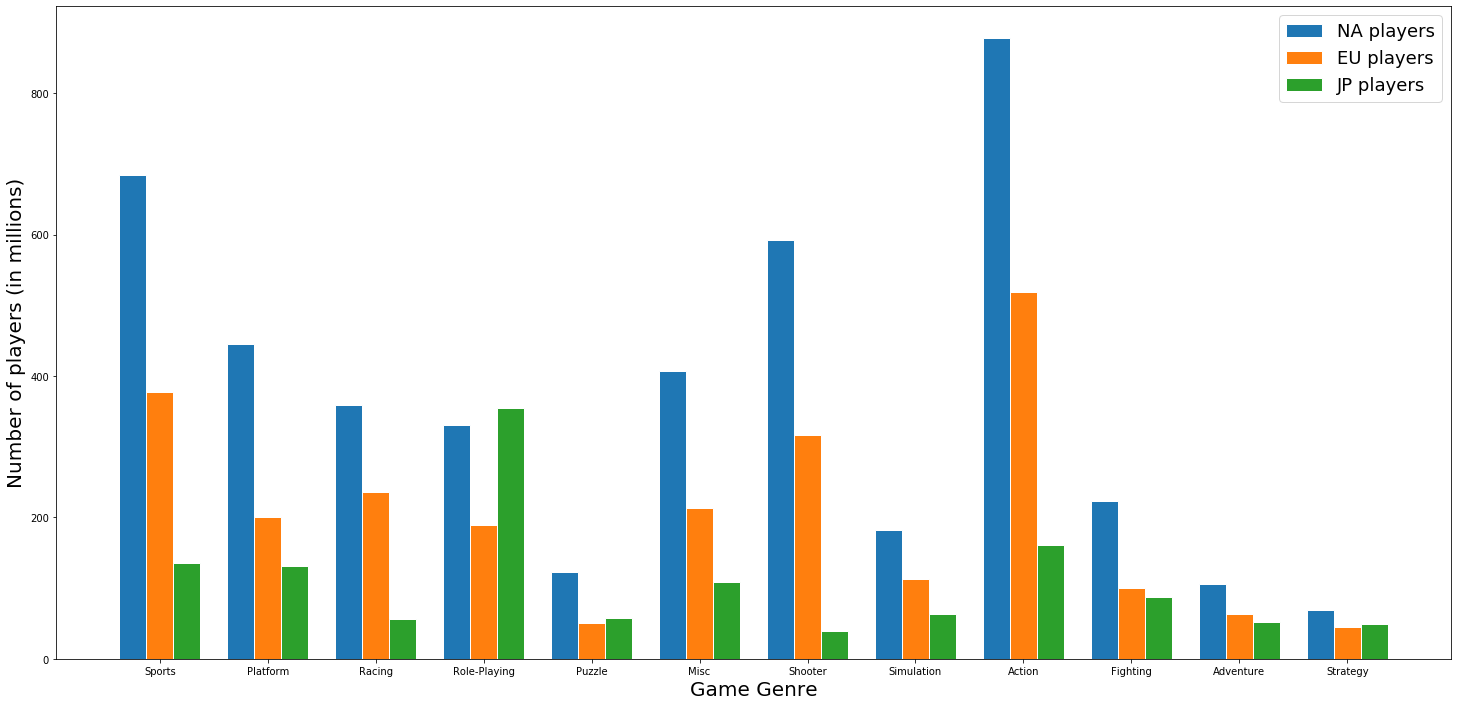

In [7]:
# differences in attributes per region

# params: the dataset, a column of the ds. returns 3 dicts, one for each region
def some_attr_per_region(dataframe, attribute):
    na = {}
    eu = {}
    jp = {}
    for i, row in dataframe.iterrows():
        g = row[attribute]
        if not pd.isnull(g):
            if g not in na:
                na[g] = 0
            na[g] += row["NA_players"]
            if g not in eu:
                eu[g] = 0
            eu[g] += row["EU_players"]
            if g not in jp:
                jp[g] = 0
            jp[g] += row["JP_players"]
    return na, eu, jp

na_by_genre, eu_by_genre, jp_by_genre = some_attr_per_region(vg_data, "Genre")



# plt.figure(figsize=(25,12))
# plt.scatter(na_players_by_genre.keys(), na_players_by_genre.values(), label='NA players', s=150)
# plt.scatter(eu_players_by_genre.keys(), eu_players_by_genre.values(), label='EU players', s=150)
# plt.scatter(jp_players_by_genre.keys(), jp_players_by_genre.values(), label='JP players', s=150)
# plt.title("")
# plt.xlabel("Game Genre", fontsize=20)
# plt.ylabel("Number of Players per region", fontsize =20)
# plt.legend(prop={'size': 18})
# plt.show()

plt.figure(figsize=(25, 12))
bar_width = 0.25
na_bars = na_by_genre.values()
eu_bars = eu_by_genre.values()
jp_bars = jp_by_genre.values()
# bar positions
r1 = np.arange(len(na_bars))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
# plot
plt.bar(r1, na_bars, width=bar_width, edgecolor='white', label='NA players')
plt.bar(r2, eu_bars, width=bar_width, edgecolor='white', label='EU players')
plt.bar(r3, jp_bars, width=bar_width, edgecolor='white', label='JP players')
plt.xlabel('Game Genre', fontsize=20)
plt.ylabel("Number of players (in millions)", fontsize=20)
plt.xticks([r + bar_width for r in range(len(na_bars))], na_by_genre.keys())

plt.legend(prop={'size': 18})
plt.show()



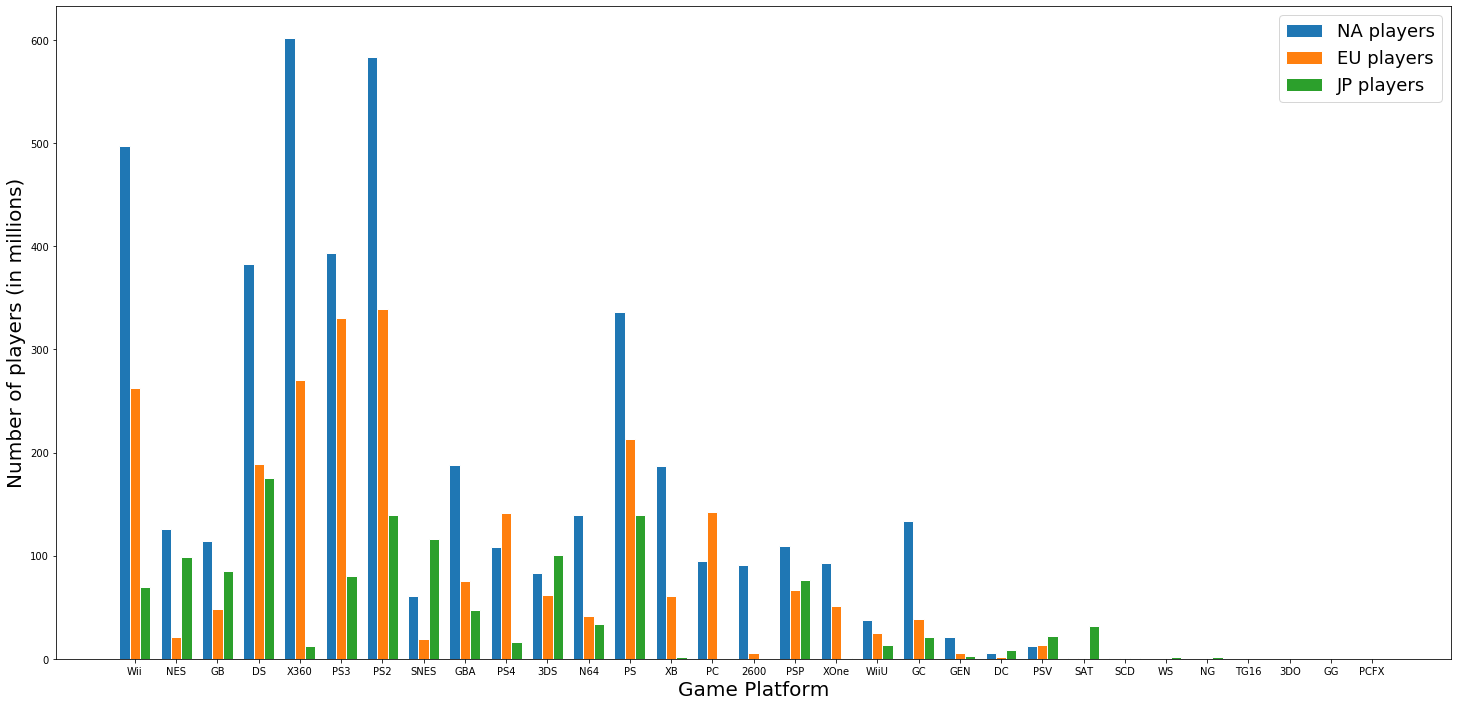

In [34]:
# regions vs platform

na_by_platform, eu_by_platform, jp_by_platform = some_attr_per_region(vg_data, "Platform")

plt.figure(figsize=(25, 12))
bar_width = 0.25
na_bars = na_by_platform.values()
eu_bars = eu_by_platform.values()
jp_bars = jp_by_platform.values()
# bar positions
r1 = np.arange(len(na_bars))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
# plot
plt.bar(r1, na_bars, width=bar_width, edgecolor='white', label='NA players')
plt.bar(r2, eu_bars, width=bar_width, edgecolor='white', label='EU players')
plt.bar(r3, jp_bars, width=bar_width, edgecolor='white', label='JP players')
plt.xlabel('Game Platform', fontsize=20)
plt.ylabel("Number of players (in millions)", fontsize=20)
plt.xticks([r + bar_width for r in range(len(na_bars))], na_by_platform.keys())

plt.legend(prop={'size': 18})
plt.show()

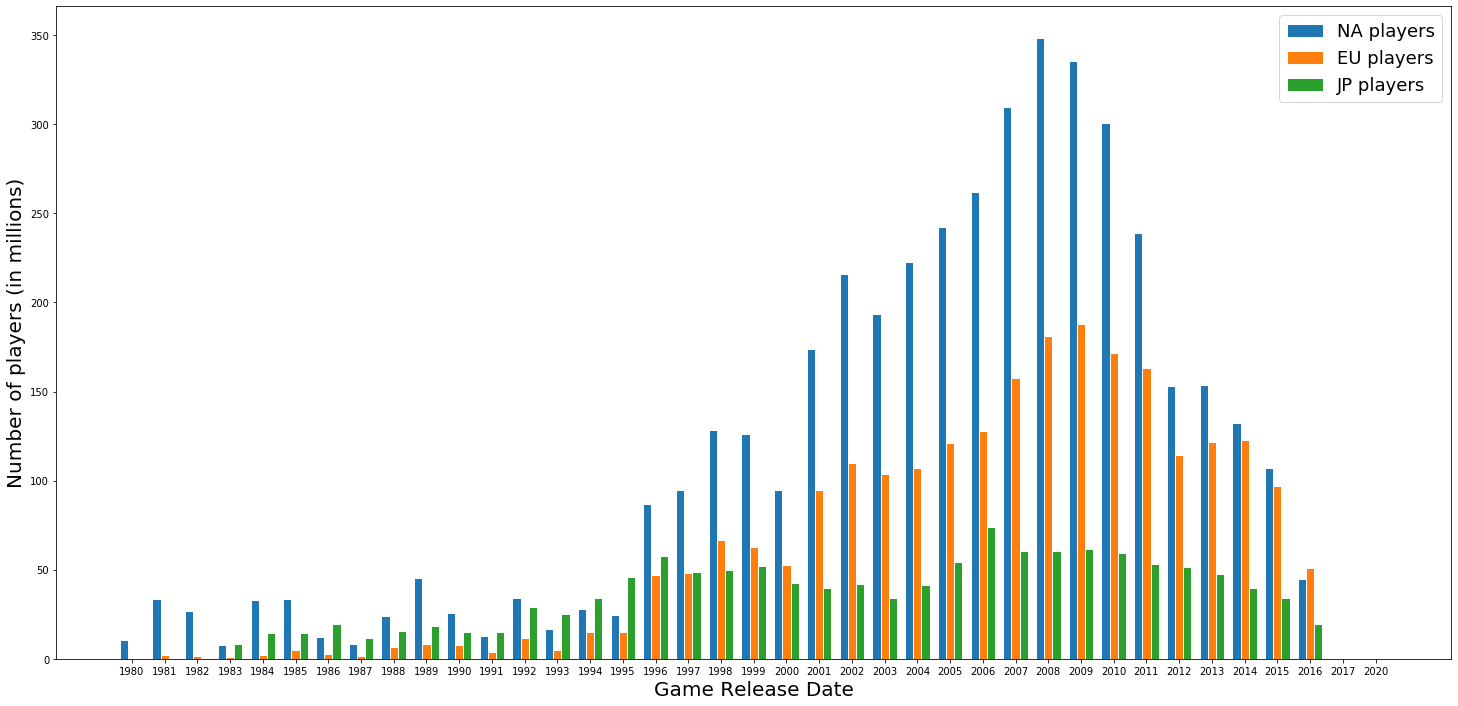

In [60]:
# regions vs game release date

na_by_release, eu_by_release, jp_by_release = some_attr_per_region(vg_data, "Year_of_Release")

na_by_release = list(na_by_release.items())
na_by_release.sort()

eu_by_release = list(eu_by_release.items())
eu_by_release.sort()

jp_by_release = list(jp_by_release.items())
jp_by_release.sort()

years = [y[0] for y in na_by_release]
years = list(map(int, years))

plt.figure(figsize=(25, 12))
bar_width = 0.25
na_bars = [v[1] for v in na_by_release]
eu_bars = [v[1] for v in eu_by_release]
jp_bars = [v[1] for v in jp_by_release]



# bar positions
r1 = np.arange(len(na_bars))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
# plot
plt.bar(r1, na_bars, width=bar_width, edgecolor='white', label='NA players')
plt.bar(r2, eu_bars, width=bar_width, edgecolor='white', label='EU players')
plt.bar(r3, jp_bars, width=bar_width, edgecolor='white', label='JP players')
plt.xlabel('Game Release Date', fontsize=20)
plt.ylabel("Number of players (in millions)", fontsize=20)
plt.xticks([r + bar_width for r in range(len(na_bars))], years)

plt.legend(prop={'size': 18})
plt.show()